# Método Runge-Kutta

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/caramirezs/MetNum_POLI/blob/main/4.2_Runge-Kutta.ipynb)

In [24]:
import numpy as np
from pylab import *
import matplotlib.pyplot as plt

def KR1(f, to, yo, tf, n=10):
    t=np.linspace(to,tf,n+1)
    y=[yo]
    h= (tf-to)/n
    for i in range(1,n+1):
        # Función de crecimiento
        a_1 = 1
        k_1 = f(t[i-1], y[i-1])
        phi = a_1*k_1
        #----------------------
        yi = y[i-1] + phi*h
        y.append(yi)
    return t,y

def KR2(f, to, yo, tf, n=10):
    t=np.linspace(to,tf,n+1)
    y=[yo]
    h= (tf-to)/n
    for i in range(1,n+1):
        # Función de crecimiento
        a_1, a_2 = 0.5, 0.5
        p_1 = 1
        q_11 = 1
        k_1 = f(t[i-1], y[i-1])
        k_2 = f(t[i-1] + p_1*h, y[i-1] + q_11*k_1*h)
        phi = a_1*k_1 + a_2*k_2
        #----------------------
        yi = y[i-1] + phi*h
        y.append(yi)
    return t,y

def KR3(f, to, yo, tf, n=10):
    t=np.linspace(to,tf,n+1)
    y=[yo]
    h= (tf-to)/n
    for i in range(1,n+1):
        # Función de crecimiento
        a_1, a_2 , a_3 = 1/6, 2/3, 1/6
        p_1, p_2 = 1/2, 1
        q_11, q_21, q_22 = 1/2, -1, 2
        k_1 = f(t[i-1], y[i-1])
        k_2 = f(t[i-1] + p_1*h, y[i-1] + q_11*k_1*h)
        k_3 = f(t[i-1] + p_1*h, y[i-1] + q_21*k_1*h + q_22*k_2*h)
        phi = a_1*k_1 + a_2*k_2 + a_3*k_3
        #----------------------
        yi = y[i-1] + phi*h
        y.append(yi)
    return t,y

def KR4(f, to, yo, tf, n=10):
    t=np.linspace(to,tf,n+1)
    y=[yo]
    h= (tf-to)/n
    for i in range(1,n+1):
        # Función de crecimiento
        k_1 = f(t[i-1], y[i-1])
        k_2 = f(t[i-1] + h/2, y[i-1] + (k_1*h)/2)
        k_3 = f(t[i-1] + h/2, y[i-1] + (k_2*h)/2)
        k_4 = f(t[i-1] + h, y[i-1] + k_3*h)
        phi = (1/6)*(k_1 + 2*k_2 + 2*k_3 + k_4)
        #----------------------
        yi = y[i-1] + phi*h
        y.append(yi)
    return t,y

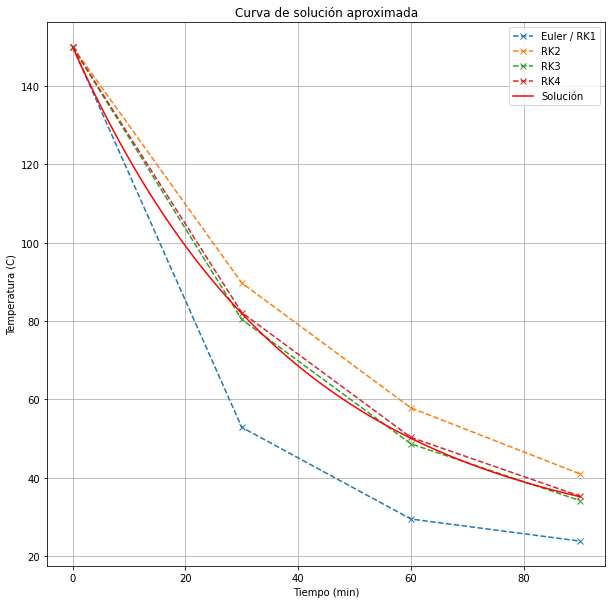

In [25]:
k = -0.0253
func = lambda t, y: k*(y- 22)
to = 0
tf = 60*1.5
yo = 150
n = 3
t,y = KR1(func,to,yo,tf, n)
t2,y2 = KR2(func,to,yo,tf, n)
t3,y3 = KR3(func,to,yo,tf, n)
t4,y4 = KR4(func,to,yo,tf, n)
fig = plt.figure(figsize=(10, 10))
plt.plot(t,y, 'x--', label='Euler / RK1')
plt.plot(t2,y2, 'x--', label='RK2')
plt.plot(t3,y3, 'x--', label='RK3')
plt.plot(t4,y4, 'x--', label='RK4')

# Si se tiene la curva solución
t_l = linspace(to , tf, 1000)
y_sol = lambda t: 22*np.exp(k*t)*(5.818181818181818 + np.exp(-k*t))
plt.plot(t_l,y_sol(t_l), 'r', label='Solución')
# # # # # # # # # # # #

plt.title("Curva de solución aproximada")
plt.grid(True)
plt.xlabel('Tiempo (min)')
plt.ylabel('Temperatura (C)')
plt.legend()
plt.show()

In [26]:
import pandas as pd

y_real = y_sol(t)
df_solu = pd.DataFrame(np.array([t,y_real,y, y2, y3, y4]).T,
                       columns=["tiempo(min)","Temperatura","y_RK1","y_RK2","y_RK3","y_RK4"])
df_solu

,tiempo(min),Temperatura,y_RK1,y_RK2,y_RK3,y_RK4
0,0.0,150.000000,150.000000,150.000000,150.000000,150.000000
1,30.0,81.921194,52.848000,89.717184,80.389280,82.159250
2,60.0,50.051168,29.434368,57.825133,48.635219,50.274495
3,90.0,35.131715,23.791683,40.952946,34.150088,35.288847


In [27]:
df_error = pd.DataFrame(np.array([t, abs(y-y_real), abs(y2-y_real), abs(y3-y_real), abs(y4-y_real)]).T,
                       columns=["tiempo(min)","error y_RK1","error y_RK2","error y_RK3","error y_RK4"])
df_error

,tiempo(min),error y_RK1,error y_RK2,error y_RK3,error y_RK4
0,0.0,0.000000,0.000000,0.000000,0.000000
1,30.0,29.073194,7.795990,1.531913,0.238056
2,60.0,20.616800,7.773965,1.415948,0.223327
3,90.0,11.340032,5.821232,0.981626,0.157133


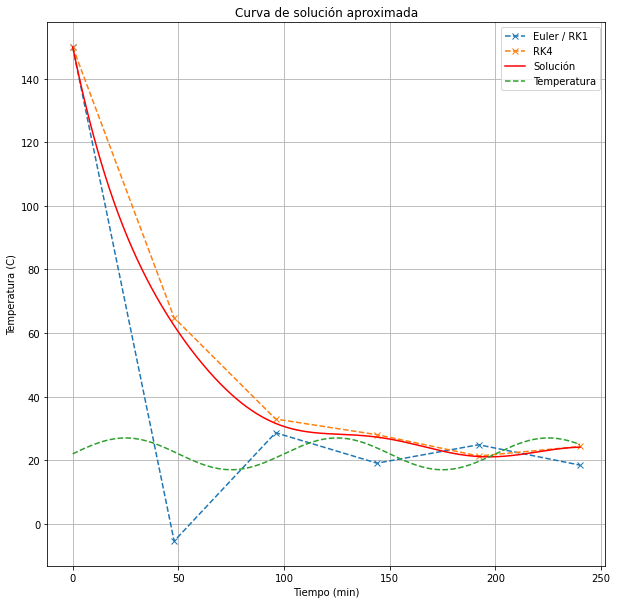

In [28]:
k = -0.0253
m = -5
d = 50
temp = lambda t: -m*np.sin(np.pi*t/d) + 22
func = lambda t, y: k*(y- temp(t))
to = 0
tf = 60*4
yo = 150
n = 5
t,y = KR1(func,to,yo,tf, n)
t2,y2 = KR2(func,to,yo,tf, n)
t3,y3 = KR3(func,to,yo,tf, n)
t4,y4 = KR4(func,to,yo,tf, n)
fig = plt.figure(figsize=(10, 10))
plt.plot(t,y, 'x--', label='Euler / RK1')
# plt.plot(t2,y2, 'x--', label='RK2')
# plt.plot(t3,y3, 'x--', label='RK3')
plt.plot(t4,y4, 'x--', label='RK4')

# Si se tiene la curva solución
t_l = linspace(to , tf, 1000)
y_sol = lambda t: (1/(d**2*k**2 + np.pi**2)) * (22*d**2*k**2 + 128*d**2*k**2*np.exp(k*t) + d*k*m*np.pi*np.exp(k*t) + 22*np.pi**2 + 128*np.pi**2*np.exp(k*t) - d*k*m*np.pi*np.cos(np.pi*t/d) - d**2*k**2*m*np.sin(np.pi*t/d))
plt.plot(t_l,y_sol(t_l), 'r', label='Solución')
plt.plot(t_l,temp(t_l), '--', label='Temperatura')
# # # # # # # # # # # #

plt.title("Curva de solución aproximada")
plt.grid(True)
plt.xlabel('Tiempo (min)')
plt.ylabel('Temperatura (C)')
plt.legend()
plt.show()

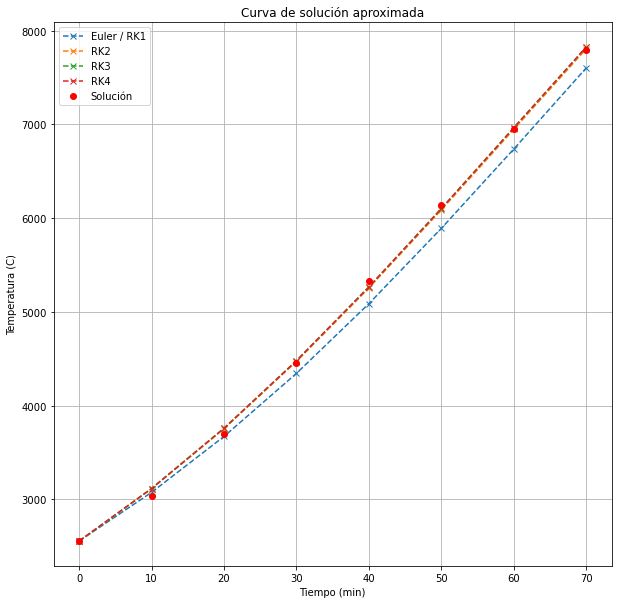

In [29]:
k = 0.02491
y_max = 13910.8
func = lambda t, y: k*(1- y/y_max)*y
to = 0
tf = 70
yo = 2555
n = 7
t,y = KR1(func,to,yo,tf, n)
t2,y2 = KR2(func,to,yo,tf, n)
t3,y3 = KR3(func,to,yo,tf, n)
t4,y4 = KR4(func,to,yo,tf, n)
fig = plt.figure(figsize=(10, 10))
plt.plot(t,y, 'x--', label='Euler / RK1')
plt.plot(t2,y2, 'x--', label='RK2')
plt.plot(t3,y3, 'x--', label='RK3')
plt.plot(t4,y4, 'x--', label='RK4')

# Si se tiene la curva solución
t_l = linspace(to , tf, n+1)
y_sol = [2555, 3034, 3700, 4458, 5327, 6143, 6956, 7794]
plt.plot(t_l,y_sol, 'or', label='Solución')
# # # # # # # # # # # #

plt.title("Curva de solución aproximada")
plt.grid(True)
plt.xlabel('Tiempo (min)')
plt.ylabel('Temperatura (C)')
plt.legend()
#plt.show()

In [30]:
import pandas as pd

y_real = np.array(y_sol)
df_solu = pd.DataFrame(np.array([t,y_real,y, y2, y3, y4]).T,
                       columns=["tiempo(min)","Población","y_RK1","y_RK2","y_RK3","y_RK4"])
df_solu

,tiempo(min),Población,y_RK1,y_RK2,y_RK3,y_RK4
0,0.0,2555.0,2555.000000,2555.000000,2555.000000,2555.000000
1,10.0,3034.0,3074.553483,3113.076261,3115.703761,3115.844501
2,20.0,3700.0,3671.152522,3753.174098,3758.757122,3759.048096
3,30.0,4458.0,4344.298188,4470.820003,4479.491312,4479.927072
4,40.0,5327.0,5088.506311,5255.083510,5266.763960,5267.322324
5,50.0,6143.0,5892.390431,6088.468262,6102.902184,6103.545364
6,60.0,6956.0,6738.450838,6948.032385,6964.862033,6965.540592
7,70.0,7794.0,7603.903083,7807.721500,7826.565721,7827.224510


In [22]:
df_error = pd.DataFrame(np.array([t, abs(y-y_real), abs(y2-y_real), abs(y3-y_real), abs(y4-y_real)]).T,
                       columns=["tiempo(min)","error y_RK1","error y_RK2","error y_RK3","error y_RK4"])
df_error

,tiempo(min),error y_RK1,error y_RK2,error y_RK3,error y_RK4
0,0.0,0.000000,0.000000,0.000000,0.000000
1,10.0,40.553483,79.076261,81.703761,81.844501
2,20.0,28.847478,53.174098,58.757122,59.048096
3,30.0,113.701812,12.820003,21.491312,21.927072
4,40.0,238.493689,71.916490,60.236040,59.677676
5,50.0,250.609569,54.531738,40.097816,39.454636
6,60.0,217.549162,7.967615,8.862033,9.540592
7,70.0,190.096917,13.721500,32.565721,33.224510


In [ ]:
k = 0.042
func = lambda t, y: -k*np.sqrt(y)
to = 0
tf = 42
yo = 4
n = 42
t,y = KR1(func,to,yo,tf, n)
t2,y2 = KR2(func,to,yo,tf, n)
t3,y3 = KR3(func,to,yo,tf, n)
t4,y4 = KR4(func,to,yo,tf, n)
fig = plt.figure(figsize=(10, 10))
plt.plot(t,y, 'x--', label='Euler / RK1')
plt.plot(t2,y2, 'x--', label='RK2')
plt.plot(t3,y3, 'x--', label='RK3')
plt.plot(t4,y4, 'x--', label='RK4')

# Si se tiene la curva solución
# t_l = linspace(to , tf, n+1)
# y_sol = [2555, 3034, 3700, 4458, 5327, 6143, 6956, 7794]
# plt.plot(t_l,y_sol, 'or', label='Solución')
# # # # # # # # # # # #

plt.title("Curva de solución aproximada")
plt.grid(True)
plt.xlabel('Tiempo (min)')
plt.ylabel('Temperatura (C)')
plt.legend()
plt.show()

In [ ]:
import pandas as pd

df_solu = pd.DataFrame(np.array([t,y, y2, y3, y4]).T,
                       columns=["tiempo(min)","y_RK1","y_RK2","y_RK3","y_RK4"])
df_solu

In [ ]:
g = 9.81
m, c, = 88.7, 0.283
func = lambda t, y: g - (c/m)*y**2
to = 0
tf = 12
yo = 0
n = 9
t, y = KR1(func, to, yo, tf, n)
t2, y2 = KR2(func, to, yo, tf, n)
t3, y3 = KR3(func, to, yo, tf, n)
t4, y4 = KR4(func, to, yo, tf, n)
fig = plt.figure(figsize=(10, 10))
plt.plot(t, y, 'x--', label='Euler / RK1')
plt.plot(t2, y2, 'x--', label='RK2')
plt.plot(t3, y3, 'x--', label='RK3')
plt.plot(t4, y4, 'x--', label='RK4')

# Si se tiene la curva solución
# t_l = linspace(to , tf, n+1)
# y_sol = [2555, 3034, 3700, 4458, 5327, 6143, 6956, 7794]
# plt.plot(t_l,y_sol, 'or', label='Solución')
# # # # # # # # # # # #

plt.title("Curva de solución aproximada")
plt.grid(True)
plt.xlabel('Tiempo (min)')
plt.ylabel('Temperatura (C)')
plt.legend()
plt.show()

In [ ]:
df_solu = pd.DataFrame(np.array([t,y, y2, y3, y4]).T,
                       columns=["tiempo(min)","y_RK1","y_RK2","y_RK3","y_RK4"])
df_solu